<a href="https://colab.research.google.com/github/antra111/DiabetesPredictionML/blob/main/Diabetes_Prediction(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DIABETES PREDICTION USING ML**


**Description:** 

*The objective of this project is to predict whether a person is diabetic or not.The dataset we are using contains several independent variables and one target variable (outcome).Predictor variables includes preganancies,Glucose,Blood Pressure,Skin Thickness,Insulin,BMI,Diabetes PedigreeFunction,age and Outcome.*


**Name of Columns with their meanings**

1.  Preganancies -->Number of times preganant
2.  Glucose --> Plasma glucose concentration a.2 hours in an oral glucose tolerance test
2.  Blood Pressure --> Diastolic blood pressure (mm Hg) 
1.  Skin Thickness -->Triceps skin fold thickness (mm)
2.  Insulin --> 2-Hour serum insulin (mu U/ml) 
1.  BMI --> Body mass Index (weight in kg/(height in m)^2)
2.  DiabetesPedigreeFunction -->Diabetes pedigree function
1.  Age -->Age (years)
2.  Outcome --> Class variable ( 0 or 1)
                  268 of 768 are 1
                  500 of 768 are 0












**Selection of Dataset**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data=pd.read_csv('/content/drive/MyDrive/Antra/Projects/diabetes (1).csv')

In [5]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Exploring Dataset**

1.**Head of Dataset**

In [6]:
#display first five records of data
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [7]:
#display the last five records
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [9]:
#Number of rows and columns
data.shape

(768, 9)

In [11]:
#list the types of all columns
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [12]:
#finding out if the dataset contains any null value
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [13]:
# Statistiical summary
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Observation:**
In the above table,the min value of columns "Pregnancies","	Glucose",	"BloodPressure",	"SkinThickness",	"Insulin","BMI"	is zero(0).It is clear that this value ca't be zero.So,I am going to calculate mean values of these columns  instead of zero.


**Data Cleaning**

In [15]:
#checking the shape before drop the duplicates
data.shape

(768, 9)

In [16]:
data=data.drop_duplicates()

In [17]:
#check the shape after drop the duplicates
data.shape

(768, 9)

As the shape is same before droppping and afrter dropping of duplicates,which shows our **dataset** has no **duplicates**.

In [19]:
#count of null values
#check the missing values in any column
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

There are no null values

In [20]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Check the no of zeros in dataset

In [21]:
print('No of zero values in Glucose ',data[data['Glucose']== 0].shape[0])

No of zero values in Glucose  5


In [29]:
print('No of zero values in Pregnancies ',data[data['Pregnancies']== 0].shape[0])

No of zero values in Pregnancies  111


In [23]:
print('No of zero values in BloodPressure ',data[data['BloodPressure']== 0].shape[0])

No of zero values in BloodPressure  35


In [24]:
print('No of zero values in SkinThickness',data[data['SkinThickness']== 0].shape[0])

No of zero values in SkinThickness 227


In [25]:
print('No of zero values in Insulin ',data[data['Insulin']== 0].shape[0])

No of zero values in Insulin  374


In [26]:
print('No of zero values in BMI',data[data['BMI']== 0].shape[0])

No of zero values in BMI 11


Replace no ofzeros values with mean of columns

In [33]:
data['Glucose']=data['Glucose'].replace(0,data['Glucose'].mean())
print('No of zero values in Glucose ',data[data['Glucose']== 0].shape[0])

No of zero values in Glucose  0


In [34]:
data['BloodPressure']=data['BloodPressure'].replace(0,data['BloodPressure'].mean())
data['Pregnancies']=data['Pregnancies'].replace(0,data['Pregnancies'].mean())
data['SkinThickness']=data['SkinThickness'].replace(0,data['SkinThickness'].mean())
data['Insulin']=data['Insulin'].replace(0,data['Insulin'].mean())
data['BMI']=data['BMI'].replace(0,data['BMI'].mean())

In [35]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.400782,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,2.984162,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,3.845052,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Data Visualization**

Negative(0):  500
Positive (1):  268


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


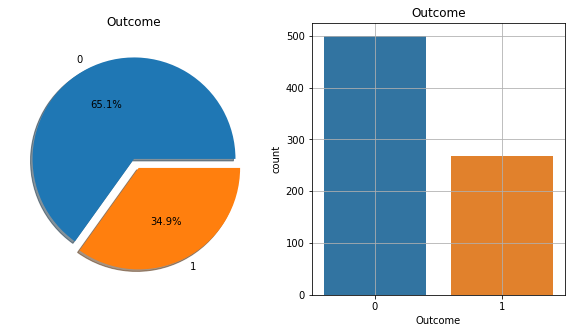

In [40]:
#Outcome of the count plot
f,ax=plt.subplots(1,2,figsize=(10,5))
data['Outcome'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Outcome')
ax[0].set_ylabel('')
sns.countplot('Outcome',data=data,ax=ax[1])
ax[1].set_title('Outcome')
N,P=data['Outcome'].value_counts()
print('Negative(0): ',N)
print('Positive (1): ',P)
plt.grid()
plt.show()

Out of 768 people,268 are diabetic (Positive (1)) and 500 are non-diabetic(negative(0))
In Outcome column,**1** represents **diabetes positive** and **0** represents **diabetes negative**.

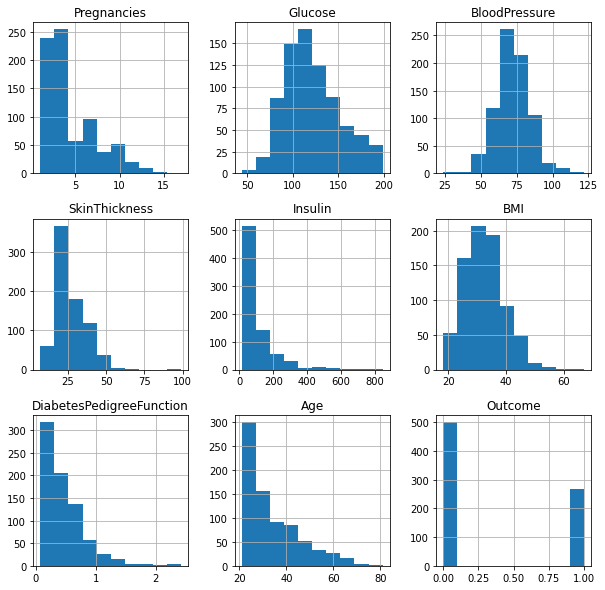

In [41]:
#Histogram of each feature
data.hist(bins=10,figsize=(10,10))
plt.show()

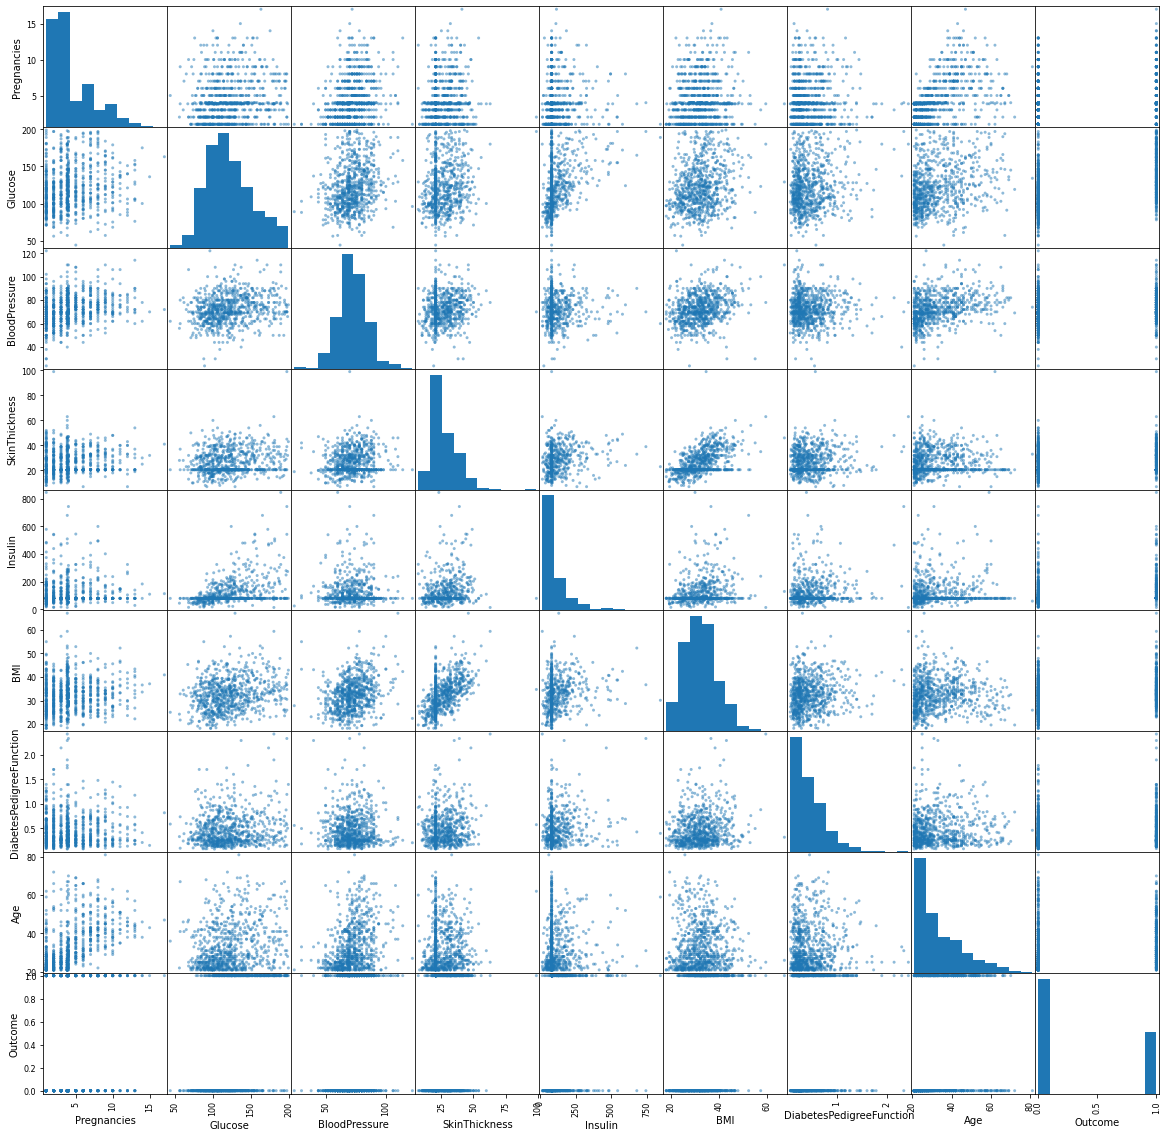

In [42]:
#Scatter plot matrix
from pandas.plotting import scatter_matrix
scatter_matrix(data,figsize=(20,20));

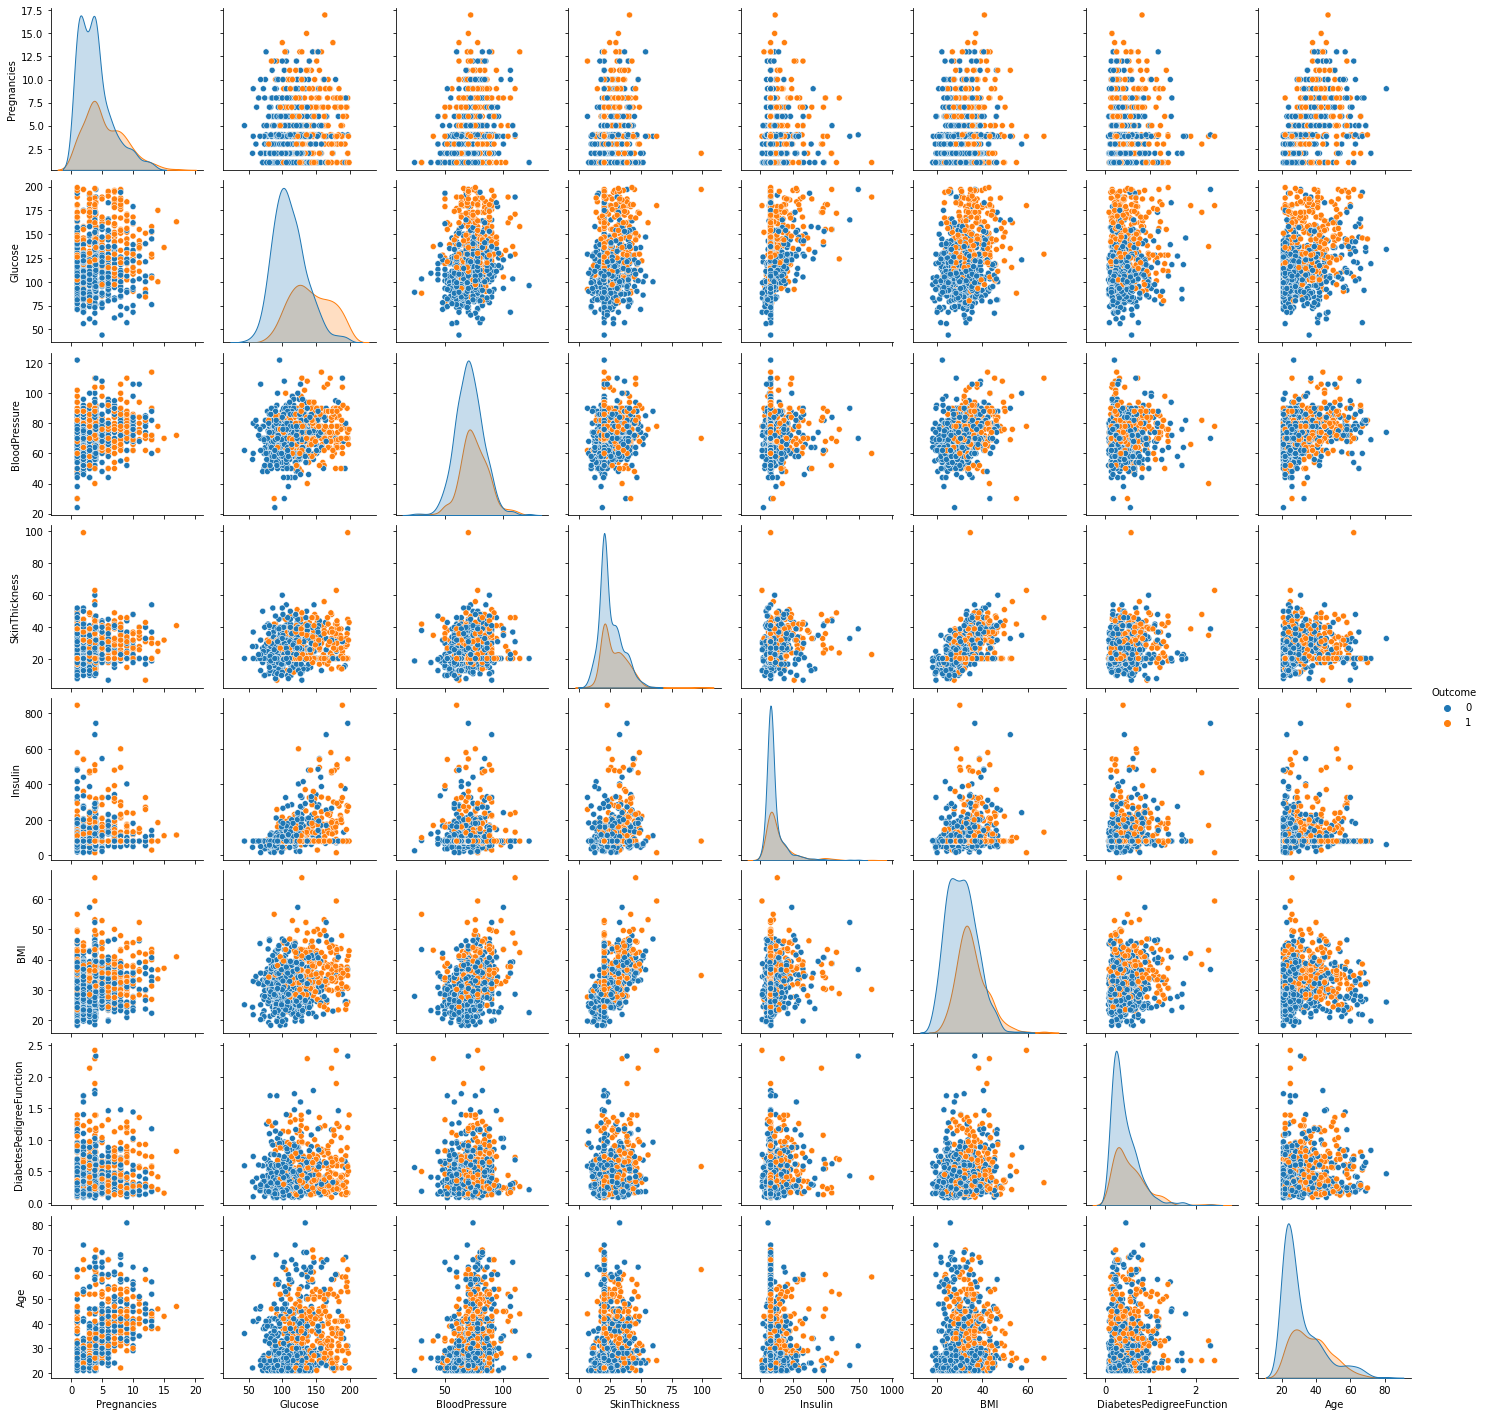

In [43]:
# PairPlot
sns.pairplot(data=data,hue='Outcome')
plt.show()

**Correlation Analysis**

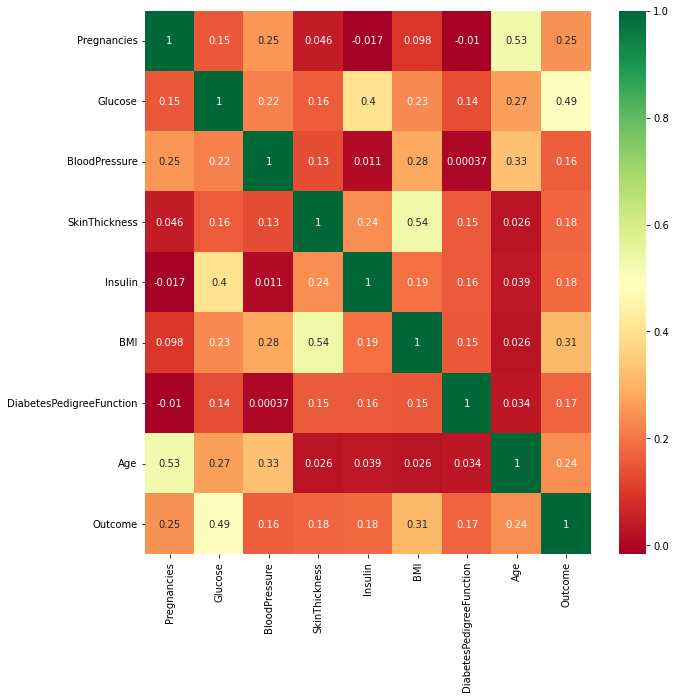

In [45]:
import seaborn as sns
#get correlations of each features in dataset
corrmat=data.corr()
top_corr_features=corrmat.index
plt.figure(figsize=(10,10))
#plot heatmap
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")

From correlation heatmap,we can see that there is a high correlation between Outcome and[Pregnancies,Glucose,BMI,Age,Insulin].We can select these features to accept input from the user and predict the outcome. 

**Split the data frame into X and y**

In [46]:
target_name='Outcome'

#Separate object for target_feature
y=data[target_name]

#Separate object for input features
X=data.drop(target_name,axis=1)

In [47]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6.000000,148.0,72.0,35.000000,79.799479,33.6,0.627,50
1,1.000000,85.0,66.0,29.000000,79.799479,26.6,0.351,31
2,8.000000,183.0,64.0,20.536458,79.799479,23.3,0.672,32
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21
4,3.845052,137.0,40.0,35.000000,168.000000,43.1,2.288,33


In [48]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

**Apply Feature Scaling**

In [49]:
#Apply Standard Scaler
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(X)
SSX=scaler.transform(X)

**TRAIN TEST SPLIT**

In [50]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(SSX,y,test_size=0.2,random_state=7)

In [51]:
X_train.shape,y_train.shape

((614, 8), (614,))

In [52]:
X_test.shape,y_test.shape

((154, 8), (154,))

**CLASSIFICATION Algorithms**

**Logistic Regression**

In [53]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

**KNeighborsClassifier (KNN)**

In [54]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

**Naive-Bayes Classifier**

In [55]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train,y_train)

GaussianNB()

**Support Vector Machine (SVM)**

In [56]:
from sklearn.svm import SVC
sv=SVC()
sv.fit(X_train,y_train)

SVC()

**Decision Tree**

In [58]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

**Random Forest**

In [59]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

**Making Pediction**

In [60]:
X_test.shape

(154, 8)

In [61]:
y_test.shape

(154,)

**Making prediction on test by using Logistic Regression**

In [62]:
lr_pred=lr.predict(X_test)

**Making prediction on test by using KNN**

In [72]:
knn_pred=knn.predict(X_test)

**Making prediction on test by using Naivie
Bayes**



In [64]:
nb_pred=nb.predict(X_test)

**Making prediction on test by using SVM**

In [65]:
sv_pred=sv.predict(X_test)

**Making prediction on test by using Decision Tree**

In [66]:
dt_pred=dt.predict(X_test)

**Making prediction on test by using Random Forest**

In [67]:
rf_pred=rf.predict(X_test)

**MODEL EVALUATION**

In [69]:
#Train score & Test score of Logistic Regression
from sklearn.metrics import accuracy_score
print("Train Acurracy of Logistic  Regression",lr.score(X_train,y_train)*100)
print("Test Accurracy of Logistic Regression",accuracy_score(y_test,lr_pred)*100)

Train Acurracy of Logistic  Regression 78.50162866449512
Test Accurracy of Logistic Regression 77.27272727272727


In [73]:
#Train score & Test score of KNN
from sklearn.metrics import accuracy_score
print("Train Acurracy of KNN",knn.score(X_train,y_train)*100)
print("Test Accurracy of KNN",accuracy_score(y_test,knn_pred)*100)

Train Acurracy of KNN 79.80456026058633
Test Accurracy of KNN 75.97402597402598


In [74]:
#Train score & Test score of Naive Bayes
from sklearn.metrics import accuracy_score
print("Train Acurracy of Naive Bayes",nb.score(X_train,y_train)*100)
print("Test Accurracy of Naive Bayes",accuracy_score(y_test,nb_pred)*100)

Train Acurracy of Naive Bayes 74.1042345276873
Test Accurracy of Naive Bayes 75.32467532467533


In [75]:
#Train score & Test score of SVM
from sklearn.metrics import accuracy_score
print("Train Acurracy of SVM",sv.score(X_train,y_train)*100)
print("Test Acurracy of SVM",accuracy_score(y_test,sv_pred)*100)

Train Acurracy of SVM 81.59609120521174
Test Accurracy of SVM 81.81818181818183


In [76]:
#Train score & Test score of Decision Tree
from sklearn.metrics import accuracy_score
print("Train Acurracy of Decision Tree",dt.score(X_train,y_train)*100)
print("Test Acurracy of Decision Tree",accuracy_score(y_test,dt_pred)*100)

Train Acurracy of SVM 100.0
Test Accurracy of SVM 77.92207792207793


In [77]:
#Train score & Test score of Random Forest
from sklearn.metrics import accuracy_score
print("Train Acurracy of Random Forest",rf.score(X_train,y_train)*100)
print("Test Acurracy of Random Forest",accuracy_score(y_test,rf_pred)*100)

Train Acurracy of Random Forest 100.0
Test Accurracy of Random Forest 80.51948051948052


As we see that accurracy score of Random forest is better than others so we prefer it for predictions.

**MODEL EVALUATION**

In [89]:
a=['A']
d=pd.DataFrame({'Pregnancies':1,'Glucose':160,'BloodPressure':80,'SkinThickness':25,'Insulin':100,'BMI':48.9,'DiabetesPedigreeFunction':0.548,'Age':60},index=a)

In [90]:
d

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
A,1,160,80,25,100,48.9,0.548,60


In [91]:
new_pred=rf.predict(d)
if new_pred>0.5:
  print('THE PATIENT IS SUFFERING FROM DIABETES.')
else:
  print('THE PATIENT IS NOT SUFFERING FROM DIABETES.')

THE PATIENT IS SUFFERING FROM DIABETES.


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:439: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
